In [8]:
import cv2
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


def plot_digit_arr(img_data):
    shape = img_data.shape[0]
    size = int(shape**0.5)
    img = img_data.reshape(size, size)
    plt.imshow(img, cmap="binary")
    plt.axis("off")

def split_image_digits(path):
    img = cv2.imread(path)
    img1 = img[0:44, 0:92]
    img2 = img[0:44, 92:184]
    img3 = img[0:44, 184:276]
    # img1 = img1.reshape(-1, 4048).astype(np.int8)
    # img2 = img2.reshape(-1, 4048).astype(np.int8)
    # img3 = img3.reshape(-1, 4048).astype(np.int8)
    return img1, img2, img3

def crop_images(paths):
    i = 0
    img_dir = os.path.join(os.getcwd(), "datasets", "images")
    if not os.path.exists(img_dir):
        os.mkdir(img_dir)
    for path in paths:
        i += 1
        new_img_path = os.path.join(img_dir, "img{}.png".format(i))
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = img_data[0:45, 0:278]
        cv2.imwrite(new_img_path, img)

def create_image_data(img_dirname, outdirname="newer_images"):
    imgs = []
    images_dir = os.path.join(os.getcwd(), "datasets", img_dirname)
    outdir = os.path.join(os.getcwd(), "datasets", outdirname)
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    paths = [os.path.join(images_dir, p) for p in os.listdir(images_dir)]
    crop_images(paths)
    i = 0
    for path in paths:
        img1, img2, img3 = split_image_digits(path)
        path1 = os.path.join(outdir, "image{}.png".format(i+1))
        path2 = os.path.join(outdir, "image{}.png".format(i+2))
        path3 = os.path.join(outdir, "image{}.png".format(i+3))
        cv2.imwrite(path1, img1)
        cv2.imwrite(path2, img2)
        cv2.imwrite(path3, img3)
        imgs.append(img1)
        imgs.append(img2)
        imgs.append(img3)
        i += 3
    return imgs

imgs = create_image_data("images")
print(imgs)

[array([[[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [  9,   9,   9],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 28,  28,  28],
        [  3,   3,   3],
        [  1,   1,   1]],

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 29,  29,  29],
        [  3,   3,   3],
        [  1,   1,   1]],

       ...,

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 28,  28,  28],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 28,  28,  28],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 28,  28,  28],
        [  2,   2,   2],
        [  0,   0,   0]

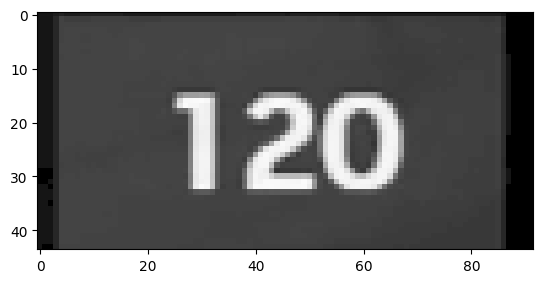

In [9]:
img1 = imgs[4]
plt.imshow(img1)

In [3]:
import os
import pandas as pd
import numpy as np
import cv2


def normalize_img(img):
    img = img * 1.0/255
    return img

# def imgs_to_dict(dirname):
#     img_dict = {}
#     image_dir = os.path.join(os.getcwd(), "datasets", dirname)
#     i = 0
#     for fname in os.listdir(image_dir):
#         img_path = os.path.join(image_dir, fname)
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         img_dict["image{}".format(i+1)] = img
#         i += 1
#     return img_dict

def imgs_to_dict(image_dir):
    img_dict = {}
    for fname in os.listdir(image_dir):
        img_path = os.path.join(image_dir, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        name = fname.split(".")[0]
        idx = name.split("image")[-1]
        img_dict[idx] = img
    return img_dict

def images_to_arr(obj):
    imgs = []
    if isinstance(obj, dict):
        imgs = [normalize_img(img) for img in obj.values()]
    elif isinstance(obj, str):
        dir_path = None 
        if os.path.isdir(imgs):
            dir_path = imgs
        else:
            dir_path = os.path.join(os.getcwd(), obj)
        for fname in sorted(os.listdir(dir_path)):
            img_path = os.path.join(dir_path, fname)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = normalize_img(img)
            imgs.append(img)
    else:
        raise TypeError(f"type {type(obj)} is not supported")
    return np.array(imgs)


# d = imgs_to_dict("newer_images")
# print(d["image1"].shape)

# a = images_to_arr(d)
# print(a.shape)


(44, 92)


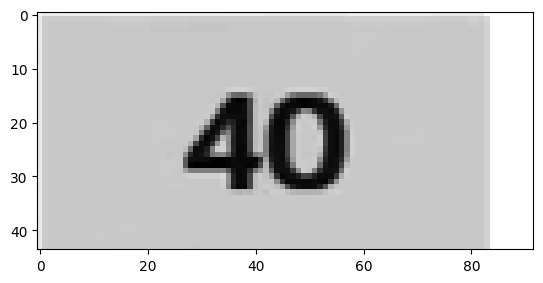

In [4]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


image_dir = os.path.join(os.getcwd(), "integer_images")
img1_path = os.path.join(image_dir, "image40.png")
img1 = cv2.imread(img1_path)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

print(img1.shape)

plt.imshow(img1, cmap="binary")

In [8]:
import os

dirpath = os.path.join(os.getcwd(), "integer_images")

d = imgs_to_dict(dirpath)
a = images_to_arr(d)
targets = np.array([int(i) for i in list(d.keys())])


x_train, x_test = a[:30], a[30:40]
y_train, y_test = np.array(targets[:30]), np.array(targets[30:40]) 

print(x_train.shape)
print(y_train.shape)

(30, 44, 92)
(30,)


In [11]:
from tensorflow import keras
import tensorflow as tf

data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(44, 92, 1)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

def build_model(input_shape, n_outputs):
    model = tf.keras.Sequential([
        #data_augmentation,
        tf.keras.layers.Reshape(target_shape=(input_shape[0], input_shape[1], 1)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        #tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(n_outputs, activation="softmax")
    ])
    model.compile(optimizer='adam',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    return model

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(44, 92)),
#     keras.layers.Dense(128, activation=tf.nn.relu),

# # Optional: You can replace the dense layer above with the convolution layers below to get higher accuracy.
#     # keras.layers.Reshape(target_shape=(28, 28, 1)),
#     # keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
#     # keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
#     # keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     # keras.layers.Dropout(0.25),
#     # keras.layers.Flatten(input_shape=(28, 28)),
#     # keras.layers.Dense(128, activation=tf.nn.relu),
#     # keras.layers.Dropout(0.5),

#     keras.layers.Dense(200)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model = build_model((44, 92), 130)
model.fit(x_train, y_train, epochs=60)
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {scores[0]}")
print(f"Accuracy: {scores[1]}")


Epoch 1/60
1/1 [==============================] - 1s 517ms/step - loss: 4.8599 - accuracy: 0.0333
Epoch 2/60
1/1 [==============================] - 0s 99ms/step - loss: 4.6004 - accuracy: 0.0333
Epoch 3/60
1/1 [==============================] - 0s 83ms/step - loss: 4.2048 - accuracy: 0.0333
Epoch 4/60
1/1 [==============================] - 0s 100ms/step - loss: 3.8853 - accuracy: 0.0333
Epoch 5/60
1/1 [==============================] - 0s 83ms/step - loss: 3.5910 - accuracy: 0.1667
Epoch 6/60
1/1 [==============================] - 0s 100ms/step - loss: 3.3340 - accuracy: 0.1667
Epoch 7/60
1/1 [==============================] - 0s 85ms/step - loss: 3.0591 - accuracy: 0.3000
Epoch 8/60
1/1 [==============================] - 0s 98ms/step - loss: 2.7819 - accuracy: 0.3333
Epoch 9/60
1/1 [==============================] - 0s 89ms/step - loss: 2.4982 - accuracy: 0.2667
Epoch 10/60
1/1 [==============================] - 0s 86ms/step - loss: 2.2378 - accuracy: 0.5000
Epoch 11/60
1/1 [=========

In [12]:

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('models\\model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\csash\AppData\Local\Temp\tmpl9trcd1x\assets


INFO:tensorflow:Assets written to: C:\Users\csash\AppData\Local\Temp\tmpl9trcd1x\assets


In [16]:
import tensorflow as tf
import os


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with open('models\\model_quantized.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\csash\AppData\Local\Temp\tmp2qnyu3ak\assets


INFO:tensorflow:Assets written to: C:\Users\csash\AppData\Local\Temp\tmp2qnyu3ak\assets


In [18]:
import numpy as np
import cv2 as cv
import os
 
img_path = os.path.join(os.getcwd(), "datasets", "digits", "digits.png")
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
x = np.array(cells)
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
print(gray.shape)
print(x.shape)
print("\n")
print(train.shape)
print(test.shape)

(1000, 2000)
(50, 100, 20, 20)


(2500, 400)
(2500, 400)


In [ ]:
import numpy as np
import cv2 as cv
import os
 
img_path = os.path.join(os.getcwd(), "datasets", "digits", "digits.png")
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
 
# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)
 
# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
 
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
 
# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
 
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

# Save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)
 
# Now load the data
with np.load('knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']